<a href="https://colab.research.google.com/github/Dav-web/MSC.-Thesis/blob/main/MSC_Thesis_Project__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text CLustering using Machine Learning Algorithms

The amount of text data being generated in the recent years has exploded exponentially. It's essential for organizations to have a structure in place to mine actionable insights from the text being generated. From social media analytics to risk management and cybercrime protection, dealing with textual data has never been more important.

Text clustering is the task of grouping a set of unlabelled texts in such a way that texts in the same cluster are more similar to each other than to those in other clusters. Text clustering algorithms process text and determine if natural clusters (groups) exist in the data.

The big idea is that documents can be represented numerically as vectors of features. The similarity in text can be compared by measuring the distance between these feature vectors. Objects that are near each other should belong to the same cluster. Objects that are far from each other should belong to different clusters. 

Essentially, text clustering involves three aspects:

* Selecting a suitable distance measure to identify the proximity of two feature vectors.
* A criterion function that tells us that we've got the best possible clusters and stop further processing.
* An algorithm to optimize the criterion function. A greedy algorithm will start with some initial clustering and refine the clusters iteratively.

What are the steps involved in text clustering?

Any text clustering approach involves broadly the following steps:

* Text pre-processing: Text can be noisy, hiding information between stop words, inflexions and sparse representations. Pre-processing makes the dataset easier to work with.
* Feature Extraction: One of the commonly used technique to extract the features from textual data is calculating the frequency of words/tokens in the document/corpus. dimensionality reduction, embeddings, and data transformations are all part of feature extraction
* Clustering: We can then cluster different text documents based on the features we have generated.
* Cluster Evaluation: This involves evaluating the clustered data to understand how well the clustering algorithm performed on the data set.
* Hyper-parameter Tuning: This involves tuning the hyper-parameters of the clustering algorithm to ensure that the optimal number of clusters is selected based on the feedback from the cluster evaluation process.

What are the steps involved in text pre-processing?
Below are the main components involved in pre-processing.

* Tokenization: Tokenization is the process of parsing text data into smaller units (tokens) such as words and phrases.
* Transformation: It converts the text to lowercase, removes all diacritics/accents in the text, and parses html tags.
* Normalization: Text normalization is the process of transforming a text into a canonical (root) form. Stemming and lemmatization techniques are used for deriving the root word.
* Filtering: Stop words are common words used in a language, such as 'the', 'a', 'on', 'is', or 'all'. These words do not carry important meaning for text clustering and are usually removed from texts.

This python code for the research thesis is divided into The following sections:

* Import libraries and helper functions
* Read in the data
* Exploratory data analysis
* Data cleaning and preprocessing
* Dimensionality reduction
* Data clustering
* Cluster evaluation
* Hyper-parameter tuning

## Import Libraries and Helper Functions

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

#for text cleaning
import string
import re
import nltk
import itertools as it
import logging
import os
import sys
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.util import everygrams
from nltk.tokenize.casual import TweetTokenizer
from collections import Counter
!pip install emoji
import emoji
nltk.download('words')
words = set(nltk.corpus.words.words())

#for visualization
import matplotlib.pyplot as plt
from textblob import TextBlob 
from wordcloud import WordCloud, STOPWORDS
from bokeh.plotting import figure, ColumnDataSource, show, output_notebook; output_notebook()
from bokeh.models import HoverTool
from bokeh.palettes import brewer, Viridis256
import seaborn as sns


# for clustering
!pip install joblib
!pip install sentence_transformers
!pip install hdbscan
!pip install umap-learn
!pip install pynndescent
!pip install llvmpy
!pip install cython
!pip install numba
import umap
import matplotlib.cm as cm
!pip install datashader
!pip install bokeh
!pip install holoviews
!pip install scikit-image
!pip install colorcet
import joblib
import  logging
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans


import hdbscan
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import yaml

# better viewing of tweet text
pd.set_option('display.max_colwidth', None)

# reproducible rng
#seed = 42

import warnings
warnings.simplefilter("ignore")
plt.style.use("bmh")
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 175 kB 8.7 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=c4b84a02b814e19139391fec7ca07c9c471303de7b795350dab197600aec29ff
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
     |████████████████████████████████| 79 kB 4.3 MB/s 
     |████████████████████████████████| 3.8 MB 19.1 MB/s 
     |████████████████████████████████| 1.2 MB 47.8 MB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
     |████████████████████████████████| 895 kB 32.2 MB/s 
     |████████████████████████████████| 6.5 MB 49.7 MB/s

     |████████████████████████████████| 5.2 MB 10.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330776 sha256=7ccb5193703a0279db15b7354162791590aaacde7cf81292b944a56f0696329b
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan
     |████████████████████████████████| 86 kB 3.6 MB/s 
     |████████████████████████████████| 1.1 MB 43.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=55282255edf8152388d82c272d663b9d0fb48b0c42a7fa808d292e231f120e15
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=08df38fce6aa6e1fa020a20042ba44c9ef6bfeca23

## Read in Data from The Data Source

In [2]:
pwd   # confirm working directory

'/content'

In [3]:
from google.colab import drive #mount the Google drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#define the root folder
root_path = '/content/gdrive/My Drive/covidvaccine.csv'

In [5]:
# load the data
df = pd.read_csv(root_path)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house from North Eastern India.,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life from my videos hope that you all like the videos 🙂,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVaccine Australia is doing very good https://t.co/kBT7l6pArY,"['CoronavirusVaccine', 'CoronaVaccine', 'CovidVaccine']",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is accepting submissions for an upcoming Volume 3 Issue 2. For further queries contact editor@infectiologyjournal.com.,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\nRead More: https://t.co/V8Y3Stu0UW\n@r_piryani @shitalbhandary… https://t.co/6jpMxX2KtI,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco Stay safe @subhashreesotwe di &amp; @iamrajchoco da ❤️❤️… https://t.co/ayhoaQm0Ls,NaN,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia","Retired university administrator. Melburnian by birth, now living in Adelaide. Look back fondly to the Whitlam years; one of Keating’s true believers.",24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what passes for leadership in our country: a voucher for something that w… https://t.co/OUUb1PeYIj,NaN,Twitter Web App,False


### Exploratory Data Analysis 

What is Exploratory Data Analysis?

Exploratory Data Analysis or (EDA) is a means of understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important in machine learning especially before modelling the data. EDA in Python uses data visualization to draw meaningful patterns and insights. It also involves the preparation of data sets for analysis by removing irregularities in the data.

Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, the data scientist can define the problem statement or definition on the data set which is very important.

How to perform Exploratory Data Analysis?

This is one such question that everyone is keen on knowing the answer. Well, the answer is it depends on the data set that the Data scientist is working on. There is no one method or common methods in order to perform EDA.

In [ ]:
# list the number of columns or features
print(df.columns)

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')


In [ ]:
# list the shape of the dataframe rows or values
print(df.shape)

(368588, 13)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368588 entries, 0 to 368587
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         368574 non-null  object 
 1   user_location     289065 non-null  object 
 2   user_description  348130 non-null  object 
 3   user_created      368563 non-null  object 
 4   user_followers    368549 non-null  float64
 5   user_friends      368549 non-null  object 
 6   user_favourites   368549 non-null  object 
 7   user_verified     368549 non-null  object 
 8   date              368547 non-null  object 
 9   text              368549 non-null  object 
 10  hashtags          306913 non-null  object 
 11  source            366135 non-null  object 
 12  is_retweet        368526 non-null  object 
dtypes: float64(1), object(12)
memory usage: 36.6+ MB


In [ ]:



df.describe()

,user_followers
count,3.685490e+05
mean,6.001895e+04
std,7.028443e+05
min,0.000000e+00
25%,1.270000e+02
50%,6.080000e+02
75%,2.796000e+03
max,1.658379e+07


In [ ]:
#helper function to view missing data
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
missing_data(df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,14,79523,20458,25,39,39,39,39,41,39,61675,2453,62
Percent,0.003798,21.575038,5.550371,0.006783,0.010581,0.010581,0.010581,0.010581,0.011124,0.010581,16.732775,0.665513,0.016821
Types,object,object,object,object,float64,object,object,object,object,object,object,object,object


In [ ]:
#Missingno library give overall visualization of the missing values in a data!
import missingno as mno

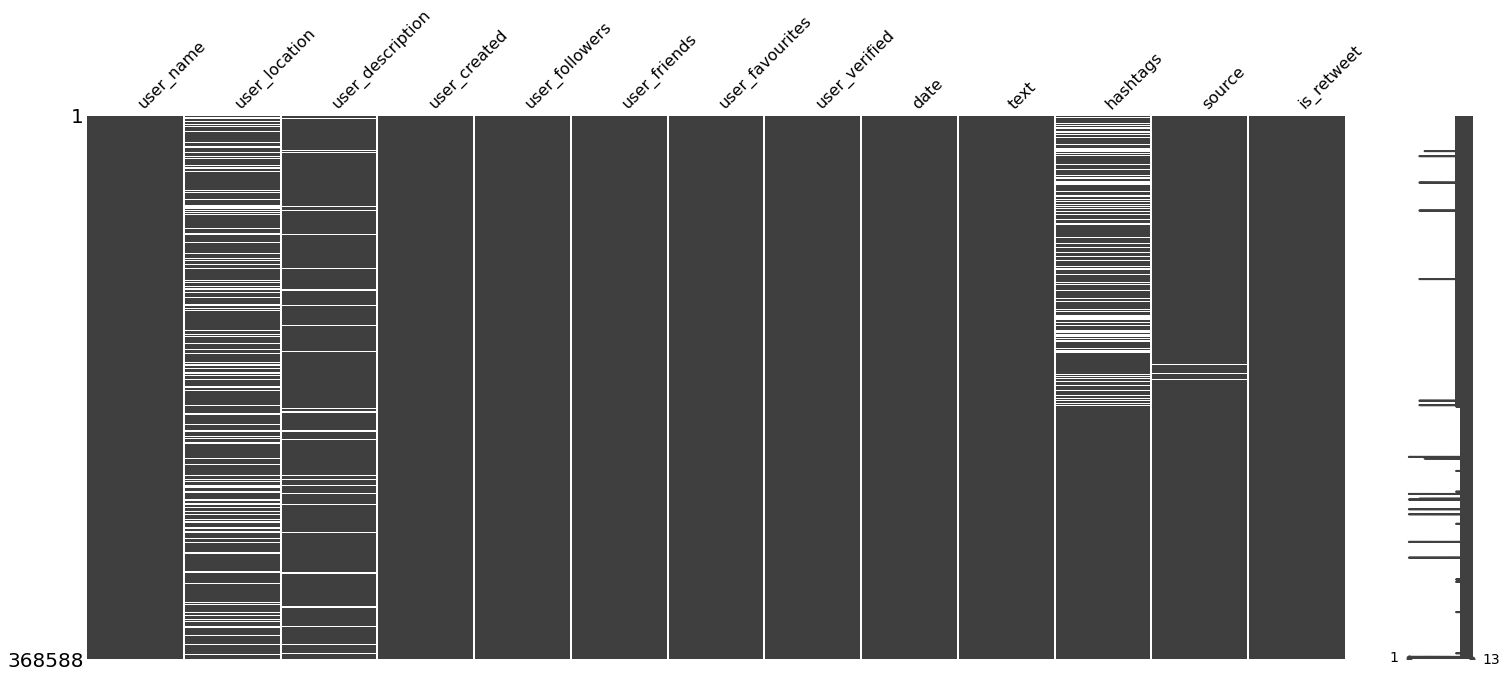

In [ ]:
mno.matrix(df)

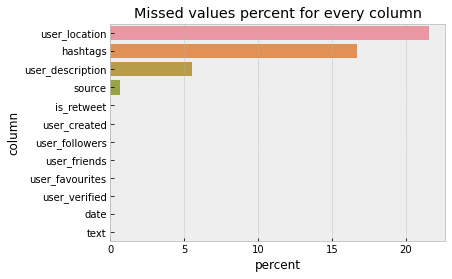

In [ ]:
missed = pd.DataFrame()
missed['column'] = df.columns

missed['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missed = missed.sort_values('percent',ascending=False)
missed = missed[missed['percent']>0]

fig = sns.barplot(
    x=missed['percent'], 
    y=missed["column"], 
    orientation='horizontal'
).set_title('Missed values percent for every column')


Reasons for missing values!
Sometimes a user doesnt add his/her description in the bio and make a tweet without any hashtags!

In [ ]:
# helper function to display unique values
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    tt['Percent from total'] = np.round(uniques / total * 100, 3)
    return(np.transpose(tt))

In [ ]:
unique_values(df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,368574.000,289065.000,348130.000,368563.000,368549.000,368549.000,368549.000,368549.000,368547.000,368549.000,306913.00,366135.000,368526.0
Uniques,152337.000,39777.000,156913.000,155807.000,27415.000,21437.000,80383.000,13.000,358908.000,368211.000,131912.00,387.000,1.0
Percent from total,41.331,13.761,45.073,42.274,7.439,5.817,21.811,0.004,97.385,99.908,42.98,0.106,0.0


Nearly 41% and 45% of the user name,and user description are unique. 99.9 % and 97.3 % of the text data are unique, and so on.

In [ ]:
# helper function to view most frequent values
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [ ]:
most_frequent_values(df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,368574,289065,348130,368563,368549,368549,368549,368549,368547,368549,306913,366135,368526
Most frequent item,VaxBLR,"Bengaluru, India","Hourly updates on FREE and PAID 18+ and 45+ vaccine slot availability across #Bengaluru BBMP,URBAN & RURAL",2021-06-21 08:44:34,40.0,0,0,False,20-08-2020 00:41,@mansukhmandviya Yes sir bcoz We #Pharmacist manage #CovidVaccine storage and distribute each and every area of #Gujarat which is very crucial role for #VCCH.\n\n#EmpowerPharmacist \n\n@CMOGuj\n@Nitinbhai_Patel \n@mdnhmgujarat \n@JpShivahare \n@mansukhmandviya \n@Pharmadept,['CovidVaccine'],Twitter Web App,False
Frequence,9659,10199,9659,9659,2518,4663,5017,295110,25,18,62444,112322,368526
Percent from total,2.621,3.528,2.775,2.621,0.683,1.265,1.361,80.073,0.007,0.005,20.346,30.678,100.0


 One of the key aspect is to understand the data thoroughly! Let's start with understanding the distribution of some of the key features !

In [ ]:
# Helper function to visualize key features
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

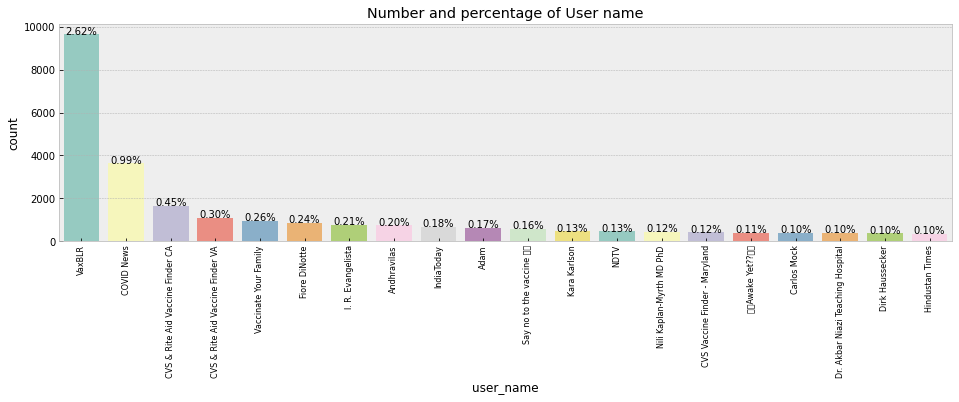

In [ ]:
plot_count("user_name", "User name", df, 4)

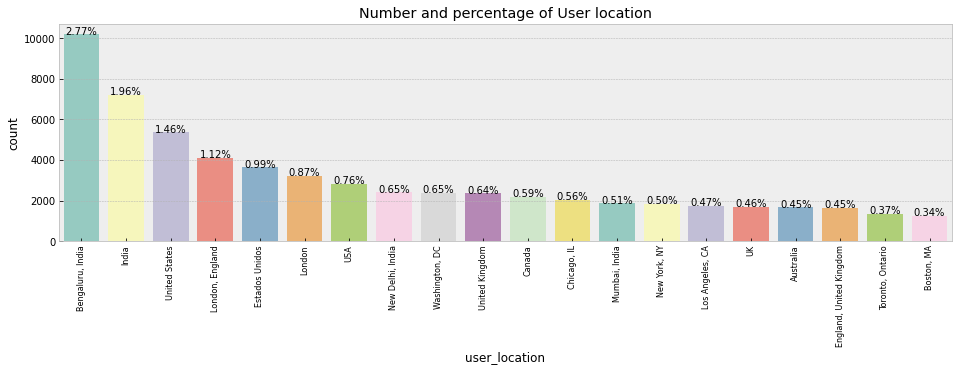

In [ ]:
plot_count("user_location", "User location", df,4)

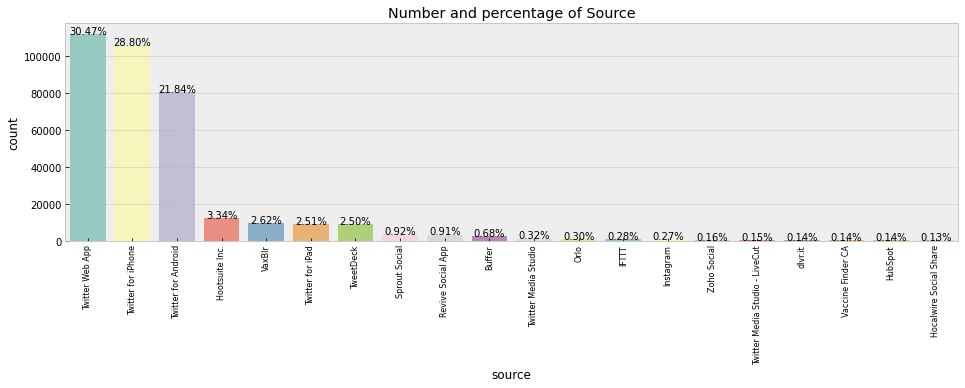

In [ ]:
plot_count("source", "Source", df,4)

In [ ]:
# example of tweets from verified sources
df[df['user_verified'] == True].head(20)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
327691,Leicestershire Partnership NHS Trust,"Leicester, Leics & Rutland","Leicestershire Partnership NHS Trust provides community health and mental health services for Leicester, Leics & Rutland. Account not monitored at weekends.",2012-04-25 09:30:56,10315.0,3182.0,27292.0,True,2021-11-26 13:11:55,Christmas shopping in Leicester this weekend? 🎄\n\nDue a #CovidVaccine? 💉\n\nTick both off your list by heading to a #Covid-19 vaccination drop-in clinic at the Highcross Shopping Centre.\n\nFor more details visit: https://t.co/GdzFscwyx7\n \n#GetVaxxedStayOnTrack https://t.co/BxaGqaDWGL,"['CovidVaccine', 'Covid', 'GetVaxxedStayOnTrack']",Hootsuite Inc.,False
327698,Canadian Intellectual Property Office,"Gatineau, QC, Canada","We administer the greater part of #IP in Canada: patents, trademarks, copyright and industrial designs.\nFR: @OPIC_Canada \nTerms: https://t.co/xUcsvJKqEQ",2012-09-19 18:52:27,11070.0,2267.0,4450.0,True,2021-11-26 13:00:14,"#DYK the second dose of the #CovidVaccine provides better, stronger and longer-lasting protection against #COVID19?\n\nHear the facts from Dr. Stanley Vollant, General Surgeon at the Notre-Dame Hospital in #Montreal ⬇️ @GovCanHealth https://t.co/zrm1cZji6c","['DYK', 'CovidVaccine', 'COVID19', 'Montreal']",Hootsuite Inc.,False
327705,NHS South Sefton CCG,"Bootle, England","We plan and buy nearly all local health services in the area. Monitored 9-5, Mon-Fri. \nFind COVID-19 info in alternative formats here: https://t.co/uvGp2wg8AZ.",2016-01-21 09:33:52,2081.0,1167.0,1245.0,True,2021-11-26 12:37:32,"Not had your #COVIDVaccine yet? Don't worry, it's not too late to have it. \n \nFind a walk-in centre near you: https://t.co/QaBB14IN07 \nBook an appointment: https://t.co/hnRqDfFWjf \nor call 119. https://t.co/ewctrwdi9c",['COVIDVaccine'],Twitter Web App,False
327709,Nili Kaplan-Myrth MD PhD,"Ottawa, Ontario",Family doc | medical anthro @mcgillu @UCL @Yale | writer | feminist | https://t.co/MWZUXrjI7X | @FulbrightSchlrs | @commschols | #Jabapalooza (she/her),2010-06-15 14:56:11,18223.0,7934.0,38539.0,True,2021-11-26 12:21:21,"Let’s go! Junior #Jabapalooza begins! We’ve got T-shirts, lollipops, superhero certificates, confetti, stickers. We’ve got paediatric #CovidVaccine, kid-friendly music on the stereo, streamers hanging from the ceiling. What a relief and celebration for #Ottawa parents &amp; kids! https://t.co/bkzZ5EWuuG","['Jabapalooza', 'CovidVaccine', 'Ottawa']",Twitter for iPhone,False
327745,Hounslow Council,"Hounslow, west London",Official Twitter feed for Hounslow Council. Follow us for tweets on news and updates in the borough. We monitor this account 9am – 5pm Mon-Fri,2010-09-22 06:47:18,15467.0,1477.0,4078.0,True,2021-11-26 10:00:35,"To get your #Covid19 and #Flu #vaccines today, head down to our drop-in clinic at the #Hounslow Jamia Masjid &amp; Islamic Centre on Wellington Road (TW4 5HU) from 10am-7pm.\n\nFor more vaccine information, visit: https://t.co/w8pF2c2v2M\n\n#covidvaccine #covid_19 #hounslow https://t.co/aiAJcLZCui","['Covid19', 'Flu', 'vaccines', 'Hounslow', 'covidvaccine', 'covid_19', 'hounslow']",Hootsuite Inc.,False
327751,Bradford Council,"Bradford, West Yorkshire","News, events and alerts from across the Bradford District. We reply during office hours and in some emergencies. To report emergencies call 01274 431000.",2010-12-13 22:42:51,31077.0,1522.0,12626.0,True,2021-11-26 09:48:50,Have you had your #CovidVaccine yet?\n#GrabAJab at the walk in clinics this weekend.\n\nTo find your local walk in vaccination clinic go to: https://t.co/KHboOnuoxU https://t.co/6tItpO3p3b,"['CovidVaccine', 'GrabAJab']",Twitter Web App,False
327754,Morecambe Bay CCG,NaN,Official Twitter Account for NHS Morecambe Bay Clinical Commissioning Group covering North Lancashire and South Cumbria.,2014-07-09 16:23:15,3266.0,494.0,1024.0,True,2021-1

In [ ]:
# example of tweets from unverified sources
df[df['user_verified'] == False].head(20)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
327680,Emergency Dept Sligo University Hospital,Sligo,Emergency Department at Sligo University Hospital in Ireland. Please note: this account is not actively monitored. We do not respond to queries via Twitter,2014-03-08 17:27:55,1681.0,620.0,635.0,False,2021-11-26 13:34:16,"People of #Sligo #Leitrim #Roscommon #Donegal #Mayo , the Emergency Department at Sligo University Hospital needs your help! Get the vaccine, get the booster! #CovidVaccine https://t.co/pwSYgmVNMA","['Sligo', 'Leitrim', 'Roscommon', 'Donegal', 'Mayo', 'CovidVaccine']",Twitter Web App,False
327681,zuei yu,NaN,"Traveller around my country, the world and the ideas.",2016-03-04 18:09:48,41.0,51.0,4822.0,False,2021-11-26 13:30:22,"@lanuevaprensaco @AnalisisUrbano "" ... we found no statistically significant difference in transmission potential between vaccinated persons and persons who were not fully vaccinated.""\nhttps://t.co/j2aGcnVN9q\n#CovidVaccine https://t.co/WwADRRgASL",['CovidVaccine'],Twitter for Android,False
327682,Poul Birch Eriksen,"Copenhagen, Denmark",Former radio broadcaster (DR P1) 🎙️; Journalist 🖋️on #GlobalHealth 🌐⚕️/Things-That-Go-Wrong ☣️/Science ⚛️ #scicomm,2012-02-16 15:11:24,311.0,82.0,260.0,False,2021-11-26 13:28:19,"The Danish🇩🇰 Health Authority follows EMA and recommends #CovidVaccine for children aged 5-11, as it will help stop chains of transmission among children and from children to parents and grandparents, via @SSTSundhed \n#COVID19 #COVID19dk\nhttps://t.co/MqyrJmImBN","['CovidVaccine', 'COVID19', 'COVID19dk']",Twitter Web App,False
327683,Opoyi,NaN,High-quality trusted conversations around news and information.,2019-01-13 18:33:22,11447.0,55.0,7.0,False,2021-11-26 13:27:34,#Coronavirus vaccine certificates may only be deemed valid for nine months for entry into the #EuropeanUnion.\n\n#CovidVaccine \n\nhttps://t.co/KB1eeVgUg6,"['Coronavirus', 'EuropeanUnion', 'CovidVaccine']",Twitter Web App,False
327684,Dr Ai Lyn Tan,"Leeds, UK","Associate Professor. Rheumatologist. Research muscle, exercise.\nR&I Director @LeedsHospitals.\nEditor-in-Chief Rheumatol Adv Pract @RheumJnl. \nAlso @AiLyn_Runner",2012-12-13 15:38:27,5772.0,193.0,11265.0,False,2021-11-26 13:25:19,This is happening...\n\nBut you can still make a difference\n✅Get #CovidVaccine #COVIDBooster \n✅#WearAMask \n✅Be responsible https://t.co/o9n5gCtObr,"['CovidVaccine', 'COVIDBooster', 'WearAMask']",Twitter Web App,False
327685,Jacob Tree-Smog QC,"Westminster, London","Hey, I’m using Twitter",2009-10-10 19:50:01,1393.0,4748.0,3271.0,False,2021-11-26 13:25:17,"Imagine being a fully grown adult and walking around with a little sticker on you saying, “I’ve had my covid vaccine.” Reminds me of a child who’s just had their tooth out at the dentist. 🤣 #CovidVaccine #COVID19AB #boostershot #vaccination #COVID-19 #coronavirus","['CovidVaccine', 'COVID19AB', 'boostershot', 'vaccination', 'COVID', 'coronavirus']",Twitter for iPhone,False
327686,"Sybil Pentsil, MD MPH",Maryland,Pediatrician | Program Director | Author | Global Educator | Mentor **Views are my own**,2011-09-28 01:43:35,545.0,376.0,2220.0,False,2021-11-26 13:22:59,South African scientists 👊🏽👊🏽👊🏽👏🏽👏🏽👏🏽found a new COVID variant 😭😭😭😰😰😰 #COVID19 #CovidVaccine,"['COVID19', 'CovidVaccine']",Twitter for iPhone,False
327687,Jane Brown,"Toronto, ON",Associate News Director @zoomerradio @classical963fm / The Morning Zoom with Sam & Jane / @BladderCancerCA Advocate #InMemoryOfMom / Love to Golf / #WeTheNorth,2013-02-28 16:39:40,2987.0,1690.0,8315.0,False,2021-11-26 13:20:29,COVID-19 booster shot eligibility will be expanded to more age groups soon: Ontario's chief medical officer. #COVIDBooster #CovidVaccine #onpoli @DrGorfinkel \nhttps://t.co/Tpf6DSnAs9 https://t.co/aycyN06Ckh,"['COVIDBooster', 'CovidVaccine', 'onpoli']",Twitter Web App,False
327688,MN Matriarch,NaN,Proud mom/grandmo

In [ ]:
# most retweeted tweets
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='is_retweet', ascending=False)[['text', 'date', 'user_name', 'user_location', 'hashtags', 'user_favourites', 'is_retweet']].head(n=20)

,text,date,user_name,user_location,hashtags,user_favourites,is_retweet
0,Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine,18-08-2020 12:55,MyNewsNE,Assam,['CovidVaccine'],110.0,False
245688,No fever. Just feeling worn out a day later from the effects of #CovidVaccine number 2. But I'm happy to officially be #FullyVaccinated. 💉💉✅✅\n\n🚫🦠 https://t.co/EruADwGYqX,2021-07-23 00:41:38,Brian B. is Fully Vaxxed 💉💉,NaN,"['CovidVaccine', 'FullyVaccinated']",12583.0,False
245708,See Ramsey only needed a free vaccine to stop D Hop #deandrehopkins #CovidIsNotOver #CovidVaccine,2021-07-23 00:14:01,Isiaha Alejandro,"Avondale, AZ","['deandrehopkins', 'CovidIsNotOver', 'CovidVaccine']",16659.0,False
245707,"Vaccination clinic happening until 7, taking walk ins!\n#begreatie #redlands #vaccination #CovidVaccine https://t.co/DSBWiF9jsJ",2021-07-23 00:14:27,Boys & Girls Clubs,"Redlands, Ca","['begreatie', 'redlands', 'vaccination', 'CovidVaccine']",1498.0,False
245706,HEAR what they have to say &amp; SHARE 🚫💉🇺🇲🙏🏼#covidVaccine #jab\nWe want to be heard - a plea from vaccine longhaulers https://t.co/Nj57upPQFz,2021-07-23 00:15:43,DeplorableMia,Illinois,"['covidVaccine', 'jab']",2100.0,False
245705,"People post about how they refuse to get their #CovidVaccine and they say things like ""my body"", ""my choice"", ""my life"", ""my right"".\n\nI just want to take them gently by the shoulders, give them a kind, sympathetic look and be like: https://t.co/6na9CImHsA",2021-07-23 00:18:59,Brian Murchie 🇨🇦,"Mississauga, Ontario",['CovidVaccine'],1226.0,False
245704,"@NicolleDWallace @clairecmc @AriMelber @chrislhayes @maddow @Lawrence @BWilliams maybe the #CovidVaccine converts could establish a PSA group or something. Photos, testimonials of their illness.",2021-07-23 00:21:42,Mary Hazlett,ohio,['CovidVaccine'],3567.0,False
245703,"Even though we have ended our drive-through 🚙 option at the Long Beach Convention Center vaccination site, we will still accommodate people who are unable to exit the vehicle. \n\nWe will not reject anyone who is seeking to receive the #COVIDVaccine. ➡️https://t.co/54uzxOPq1N https://t.co/v7B7IGtqVO",2021-07-23 00:22:01,City of Long Beach,"Long Beach, Calif.",['COVIDVaccine'],12282.0,False
245702,Just a bit too young for the #CovidVaccine . Tears my heart apart. https://t.co/FI34k97wG6,2021-07-23 00:23:31,Sharon Lina Pearce,"Maryland, USA",['CovidVaccine'],14431.0,False
245701,"New daily cases has more than doubled, from 13,200 on July 4 to more than 32,300 on July 18, a surge….\n#COVID #COVID19Vaccine #COVID19Vaccination #CovidVaccine #CoronavirusPandemic #DeltaVariant \n\nvia @GoogleNews (@andhi_toofan) https://t.co/WVpb2CAEML",2021-07-23 00:23:48,COVID News,Estados Unidos,"['COVID', 'COVID19Vaccine', 'COVID19Vaccination', 'CovidVaccine', 'CoronavirusPandemic', 'DeltaVariant']",131.0,False


In [ ]:
# user favorites
df.sort_values(by=['date', 'user_favourites'], ascending=[True, False])[['text', 'date', 'user_name', 'user_location', 'hashtags', 'user_favourites', 'is_retweet']].head(n=20)

,text,date,user_name,user_location,hashtags,user_favourites,is_retweet
4126,Don’t politicize the #CDC and the #FDA. I’m perfectly happy to wait until 2021 for a thoroughly tested… https://t.co/7zc9JFFjvk,01-09-2020 00:04,SouthSide,NaN,"['CDC', 'FDA']",29884.0,False
4125,Whomever the President is needs to get the #covidvaccine on live TV when it comes out.,01-09-2020 00:05,Candidate PAJ,NaN,['covidvaccine'],41.0,False
4124,@GregHuntMP You forgot to mention $5 million in funding first came from Qld Labor gov #covidvaccine,01-09-2020 00:09,💧Salty Noulty💧,"Brisbane, Australia",['covidvaccine'],11076.0,False
4123,Is Trump pressuring #FDA for an October #Covidvaccine surprise? @drlapook sought answers:\nhttps://t.co/Ixlr6mESme,01-09-2020 00:49,PETER MAER,"Washington, DC","['FDA', 'Covidvaccine']",1563.0,False
4122,Here we go. #COVIDvaccine https://t.co/FZgtcJ6XDP,01-09-2020 00:59,B Sabs,NaN,['COVIDvaccine'],19193.0,False
5969,It's a #Scamdemic and only the sheeple who wear muzzles will line up for the #CovidVaccine https://t.co/gfsVuHe4Xg,01-09-2020 01:04,RecallGavinNewsom,United States,"['Scamdemic', 'CovidVaccine']",2945.0,False
4121,@USlawreview Yet #Fauci is saying a vaccine might not help defeat #covid. So if the survival rate is 99.76% he is s… https://t.co/bi1dZAbv1N,01-09-2020 01:09,Name cannot be blank,"New York, USA","['Fauci', 'covid']",12048.0,False
4120,"""Step Up To The Plate"" \ninitiate a #uniteforfreedom gathering \nto say No 2 #lockdown \n#NewNormal #COVIDVaccine… https://t.co/zp8eJLeq7T",01-09-2020 01:28,rosannemiller,USA,"['uniteforfreedom', 'lockdown', 'NewNormal', 'COVIDVaccine']",37157.0,False
4119,"Consider enrolling in this #COVID19 #CovidVaccine vaccine trial. Science, not politics, will win vs. COVID! I just… https://t.co/1FGWcYnnXQ",01-09-2020 01:56,John J. Seng,"Washington, DC","['COVID19', 'CovidVaccine']",317.0,False
4118,Ok\nA serious question to note:\n\nIf dengue fever vaccine can potentially induce fatal auto immune reaction when the… https://t.co/BeoTKfNfWU,01-09-2020 02:09,BigSlothOne,NaN,NaN,925.0,False


In [ ]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

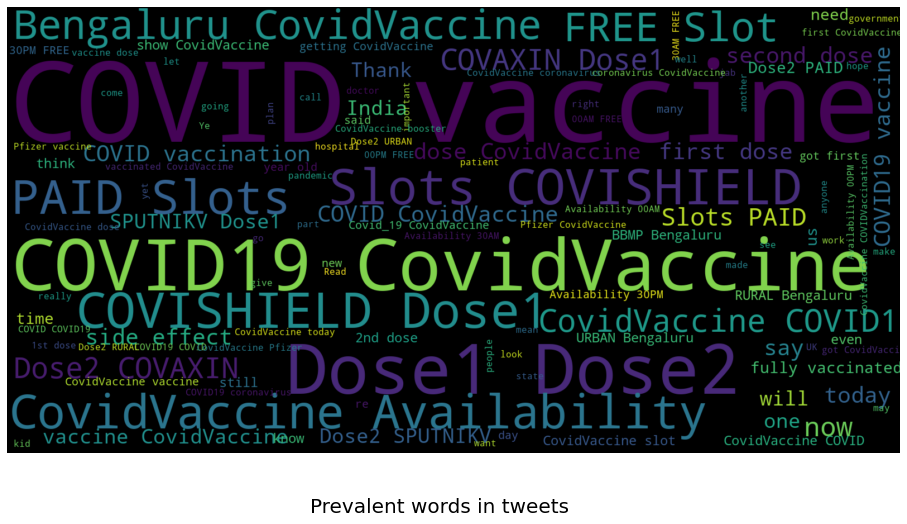

In [ ]:
show_wordcloud(df['text'], title = 'Prevalent words in tweets')

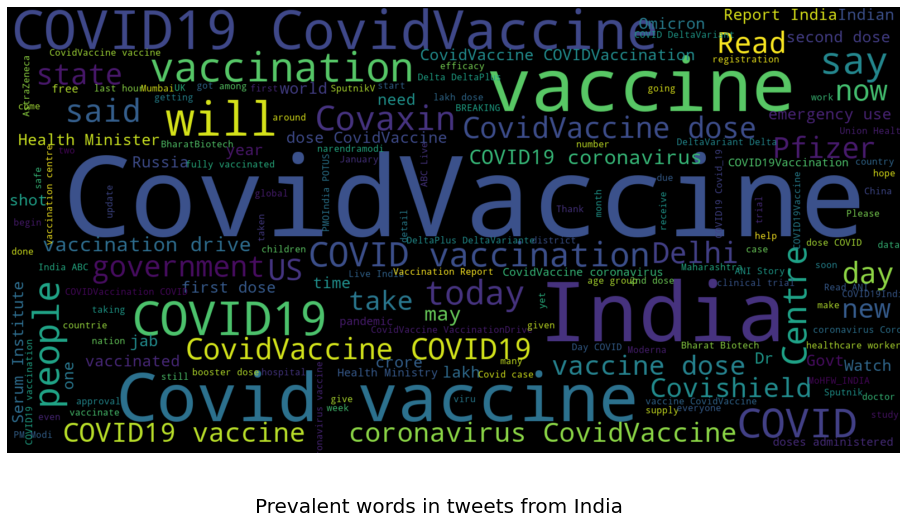

In [ ]:
india_df = df.loc[df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

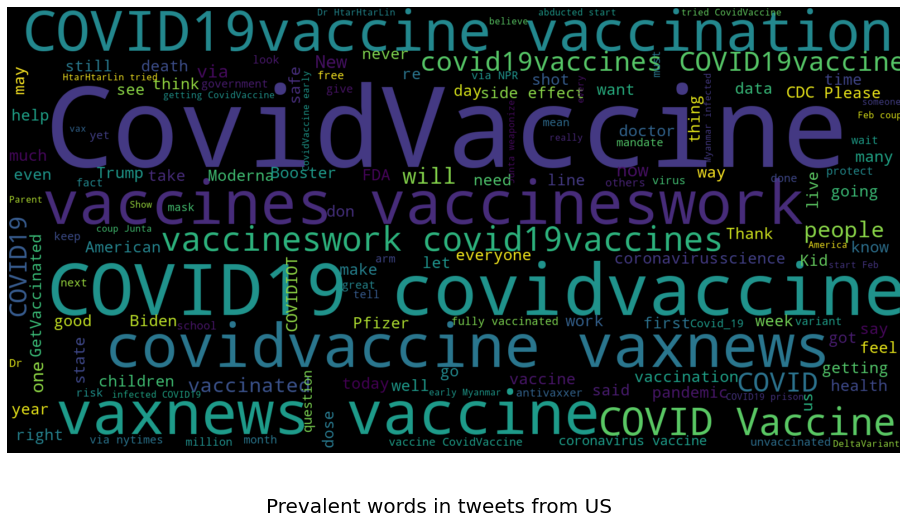

In [ ]:
us_df = df.loc[df.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from US')

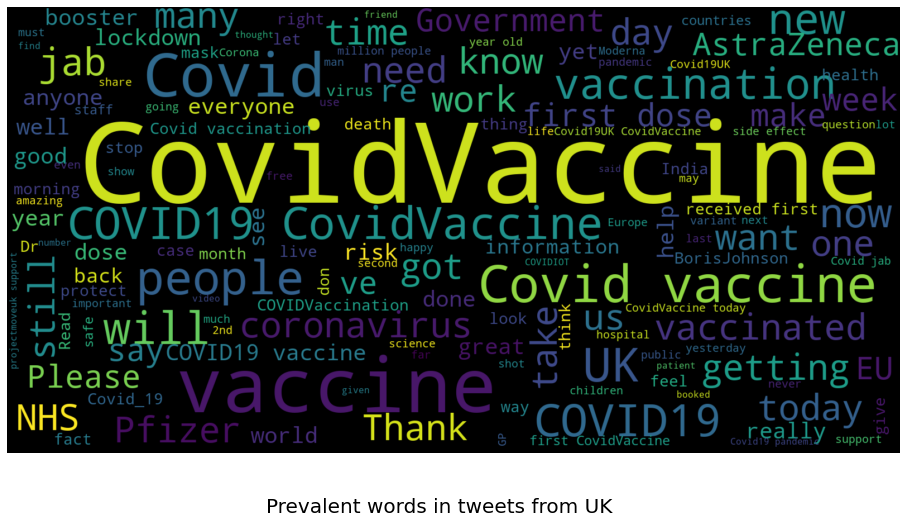

In [ ]:
uk_df = df.loc[df.user_location=="United Kingdom"]
show_wordcloud(uk_df['text'], title = 'Prevalent words in tweets from UK')

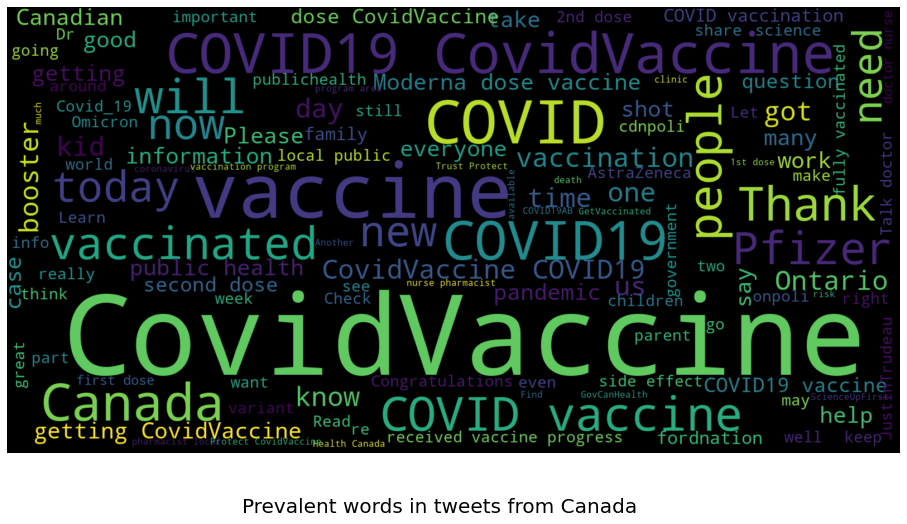

In [ ]:
ca_df = df.loc[df.user_location=="Canada"]
show_wordcloud(ca_df['text'], title = 'Prevalent words in tweets from Canada')

In [ ]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, 
                         bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, 
                         label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

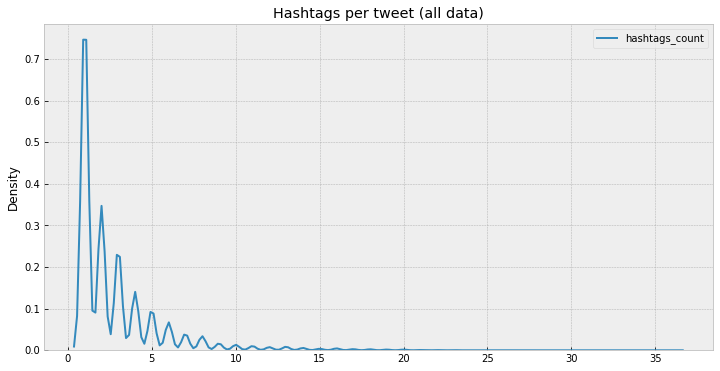

In [ ]:
# view hashtags on all tweets
df['hashtags'] = df['hashtags'].replace(np.nan, "['None']", regex=True)
df['hashtags'] = df['hashtags'].apply(lambda x: x.replace('\\N',''))
df['hashtags_count'] = df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 
                           'Hashtags per tweet (all data)', df)

In [ ]:
# view individual hashtags
df['hashtags_individual'] = df['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(df['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}")

There are totally: 107654


In [ ]:
# view hashtags dataframe
df['hashtags_individual'].head()

0                                             [['CovidVaccine']]
1    [['CoronavirusVaccine',  'CoronaVaccine',  'CovidVaccine']]
2                                                     [['None']]
3                                                     [['None']]
4                                                     [['None']]
Name: hashtags_individual, dtype: object

In [ ]:
# change date on the date column to standard date time
df['datedt'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['datedt'].dt.year
df['month'] = df['datedt'].dt.month
df['day'] = df['datedt'].dt.day
df['dayofweek'] = df['datedt'].dt.dayofweek
df['hour'] = df['datedt'].dt.hour
df['minute'] = df['datedt'].dt.minute
df['dayofyear'] = df['datedt'].dt.dayofyear
df['date_only'] = df['datedt'].dt.date

In [ ]:
tweets_agg_df = df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [ ]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

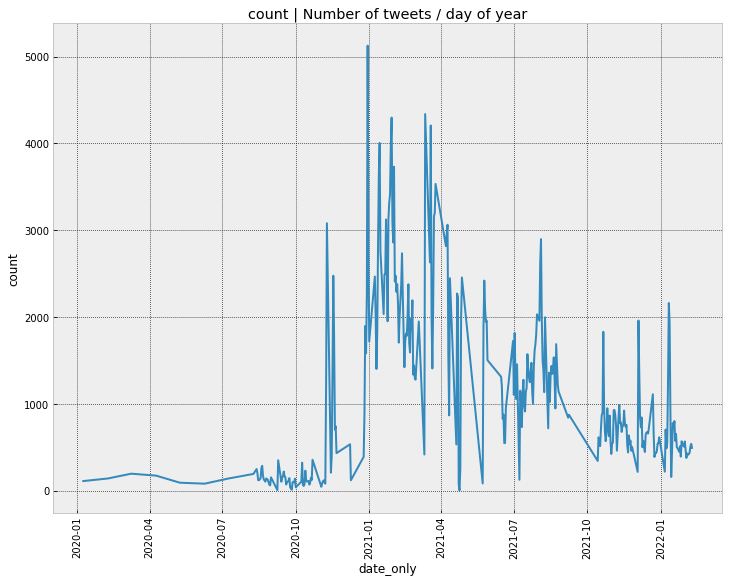

In [ ]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

## Data Cleaning and Preprocessing

In [ ]:
def get_all_tokens(tweet_list):
    """
    Helper function to generate a list of text tokens from concatenating
    all of the text contained in Tweets in `tweet_list`
    """
    # concat entire corpus
    all_text = (df['text'].to_list())
    all_text = ' '.join((t for t in str(all_text).split()))
    # tokenize
    tokens = (TweetTokenizer(preserve_case=False,
                            reduce_len=True,
                            strip_handles=False)
              .tokenize(all_text))
    # remove symbol-only tokens for now
    tokens = [tok for tok in tokens if not tok in string.punctuation]
    return tokens

In [ ]:
tokens = get_all_tokens(df['text'])

print('total number of tokens: {}'.format(len(tokens)))

total number of tokens: 8872460


In [ ]:
# calculate a range of ngrams using some handy functions
top_grams = Counter(everygrams(tokens, min_len=2, max_len=4))

top_grams.most_common(25)

[(('n', 'n'), 51911),
 (('the', '#covidvaccine'), 31386),
 (('nhttps', ':/'), 28692),
 (('covid', '19'), 26970),
 (('n', '#covidvaccine'), 25477),
 (('of', 'the'), 24466),
 (('’', 's'), 23883),
 (('#covid19', '#covidvaccine'), 20777),
 (('to', 'get'), 16774),
 (('in', 'the'), 15971),
 (('#covidvaccine', 'n'), 15848),
 (('’', 't'), 15647),
 (('n', 'nhttps'), 13456),
 (('n', 'nhttps', ':/'), 13449),
 (('the', 'vaccine'), 11703),
 (('for', 'the'), 11256),
 (('n', '#covid19'), 11066),
 (('19', 'vaccine'), 10867),
 (('slots', 'n'), 10791),
 (('covid', '19', 'vaccine'), 10736),
 (('n', '#covishield'), 10577),
 (('to', 'be'), 10412),
 (('slots', 'n', '#covishield'), 10371),
 (('#covishield', 'dose'), 10075),
 (('n', '#covishield', 'dose'), 10072)]

In [13]:
unique_tweet_cnt = len(set(df.text))

In [14]:
unique_fav_cnt = len(set(df.user_favourites))

In [ ]:
def my_tokenizer(in_string):
    """
    Convert `in_string` of text to a list of tokens using NLTK's TweetTokenizer
    """
    # reasonable, but adjustable tokenizer settings
    tokenizer = TweetTokenizer(preserve_case=False,
                               reduce_len=True,
                               strip_handles=False)
    tokens = tokenizer.tokenize(in_string)
    return tokens

In [ ]:
my_tokenizer(df.text[51])

['so',
 'glad',
 'it',
 'works',
 '#covid_19',
 '#covidph',
 '#russianvaccine',
 '#covidvaccine',
 '#philhealthcorruption',
 'https://t.co/kpHnWweJ0i']

In [6]:
def make_punc_stopwords(max_length=4):
    """Generates punctuation 'words' up to
    ``max_length`` characters.
    """
    def punct_maker(length):
        return ((''.join(x) for x in it.product(string.punctuation,
                                                repeat=length)))
    words = it.chain.from_iterable((punct_maker(length)
                                    for length in range(max_length+1)))
    return list(words)

In [7]:
!pip install nltk
from nltk.corpus import stopwords
my_stopwords = set(stopwords.words('english'))

In [8]:
my_stopwords = list(it.chain(my_stopwords, make_punc_stopwords(max_length=4)))

print('current count of stopwords: {}'.format(len(my_stopwords)))
print('example punctuation words:\n {}'.format(my_stopwords[-10:]))

current count of stopwords: 1082580
example punctuation words:
 ['~~~[', '~~~\\', '~~~]', '~~~^', '~~~_', '~~~`', '~~~{', '~~~|', '~~~}', '~~~~']


In [9]:
import pandas as pd
import re
import gensim
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'         # define a string of punctuation symbols

# Functions to clean tweets
def remove_links(tweet):
    """Takes a string and removes web links from it"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet

def remove_users(tweet):
    """Takes a string and removes retweet and @user information"""
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', str(tweet))  # remove re-tweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', str(tweet)) # remove tweeted at
    return tweet

def remove_hashtags(tweet):
    """Takes a string and removes any hash tags"""
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove hash tags
    return tweet

def remove_av(tweet):
    """Takes a string and removes AUDIO/VIDEO tags or labels"""
    tweet = re.sub('VIDEO:', '', tweet)  # remove 'VIDEO:' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # remove 'AUDIO:' from start of tweet
    return tweet

def tokenize(tweet):
    """Returns tokenized representation of words in lemma form excluding stopwords"""
    result = []
    for token in gensim.utils.simple_preprocess(tweet, deacc=True, min_len=2):  # drops words with less than 3 characters
            result.append(lemmatize(token))
    return result

def lemmatize(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token, pos='v')

def preprocess_tweet(tweet):
    """Main master function to clean tweets, stripping noisy characters, and tokenizing use lemmatization"""
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet_token_list = tokenize(tweet)  # apply lemmatization and tokenization
    tweet = ' '.join(tweet_token_list)
    return tweet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [10]:
df['tweet'] = df['text'].map(lambda x: preprocess_tweet(x))

In [11]:
df[['tweet', 'text']].head()

,tweet,text
0,australia to manufacture covid vaccine and give it to the citizens for free of cost afp quote prime minister,Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine
1,australia be do very good,#CoronavirusVaccine #CoronaVaccine #CovidVaccine Australia is doing very good https://t.co/kBT7l6pArY
2,deaths due to covid in affect countries read more,Deaths due to COVID-19 in Affected Countries\nRead More: https://t.co/V8Y3Stu0UW\n@r_piryani @shitalbhandary… https://t.co/6jpMxX2KtI
3,stay safe di amp da,@Team_Subhashree @subhashreesotwe @iamrajchoco Stay safe @subhashreesotwe di &amp; @iamrajchoco da ❤️❤️… https://t.co/ayhoaQm0Ls
4,this be what pass for leadership in our country voucher for something that,@michellegrattan @ConversationEDU This is what passes for leadership in our country: a voucher for something that w… https://t.co/OUUb1PeYIj


In [15]:
vec = TfidfVectorizer(min_df=2,
                      stop_words=my_stopwords,
                      max_features=unique_tweet_cnt//100,
                     )

In [16]:
tfidf_matrix = vec.fit_transform(df['tweet'].values.astype(str))

In [17]:
print(tfidf_matrix.shape), print(type(tfidf_matrix))

(368588, 3682)
<class 'scipy.sparse.csr.csr_matrix'>


(None, None)

In [ ]:
tfidf_matrix

In [19]:
print(vec.vocabulary_)

{'australia': 260, 'manufacture': 1975, 'covid': 778, 'vaccine': 3463, 'give': 1406, 'citizens': 594, 'free': 1343, 'cost': 756, 'quote': 2632, 'prime': 2534, 'minister': 2059, 'good': 1419, 'deaths': 857, 'due': 1017, 'affect': 75, 'countries': 763, 'read': 2661, 'stay': 3103, 'safe': 2843, 'di': 924, 'amp': 142, 'da': 826, 'pass': 2354, 'leadership': 1868, 'country': 764, 'something': 3043, 'multi': 2122, 'system': 3202, 'syndrome': 3200, 'children': 574, 'disease': 957, 'well': 3584, 'let': 1885, 'qualify': 2617, 'would': 3644, 'anyone': 173, 'party': 2353, 'get': 1400, 'rush': 2835, 'test': 3247, 'come': 658, 'russia': 2836, 'without': 3619, 'ability': 4, 'make': 1962, 'locally': 1915, 'force': 1318, 'rely': 2732, 'others': 2299, 'like': 1902, 'us': 3438, 'china': 576, 'zoom': 3679, 'chart': 556, 'st': 3083, 'week': 3575, 'hear': 1513, 'episode': 1110, 'executive': 1171, 'contract': 731, 'coronavirus': 748, 'inform': 1697, 'twitter': 3382, 'great': 1448, 'news': 2185, 'enter': 1102

In [20]:
terms = vec.get_feature_names()
terms

['aaron',
 'ab',
 'abc',
 'abduct',
 'ability',
 'abingdon',
 'able',
 'abort',
 'abortion',
 'abroad',
 'absolute',
 'absolutely',
 'abt',
 'abuse',
 'accelerate',
 'accept',
 'acceptable',
 'acceptance',
 'access',
 'accessible',
 'accident',
 'accomplish',
 'accord',
 'account',
 'accountable',
 'accucard',
 'accurate',
 'accuse',
 'ache',
 'achieve',
 'achievement',
 'achy',
 'acknowledge',
 'acquire',
 'across',
 'act',
 'action',
 'active',
 'actively',
 'activities',
 'activity',
 'actor',
 'actual',
 'actually',
 'acute',
 'acworth',
 'ad',
 'add',
 'addition',
 'additional',
 'address',
 'adelanto',
 'adequate',
 'admin',
 'administer',
 'administrate',
 'administration',
 'admission',
 'admissions',
 'admit',
 'adolescents',
 'adopt',
 'ads',
 'adult',
 'adults',
 'advance',
 'advantage',
 'adverse',
 'advertise',
 'advice',
 'advise',
 'advisory',
 'advocate',
 'af',
 'affairs',
 'affect',
 'afford',
 'affordable',
 'afraid',
 'africa',
 'african',
 'africans',
 'afternoon',

In [21]:
# get the first vector out (for the first document) 
first_vector_tfidfvectorizer=tfidf_matrix[0]

In [22]:
# get shape of the vectorizer
first_vector_tfidfvectorizer.shape

(1, 3682)

In [23]:
# place tf-idf values in a pandas data frame 
df_ = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=vec.get_feature_names(), columns=["tfidf"]) 
df_.sort_values(by=["tfidf"],ascending=False)


,tfidf
quote,0.404464
prime,0.365889
manufacture,0.355286
cost,0.349879
australia,0.341445
...,...
faster,0.000000
fastest,0.000000
fat,0.000000
fatalities,0.000000


In [29]:
(pd.DataFrame(tfidf_matrix[:10].todense(),
              columns=[x for x in vec.get_feature_names()])
 # experiment by choosing any range of feature indices (alphabetical order)
 .iloc[:,730:750])

,continue,contract,contribute,contribution,control,controversy,convenient,convention,conversation,conversations,convince,cook,cool,coordinate,cop,copy,corner,corona,coronavirus,corporate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Sentence Embeddings

In [30]:
# convert texts from pandas to numpy arrays
data = df['tweet'].values.tolist()

In [31]:
# import the sentence transformer object
from sentence_transformers import SentenceTransformer

In [32]:
# define a sentence transformer embedding
transformer_model = SentenceTransformer('all-roberta-large-v1')

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.84k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/650 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/328 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [33]:
# Create documents embeddings
embeddings = transformer_model.encode(data, show_progress_bar=True)

Batches:   0%|          | 0/11519 [00:00<?, ?it/s]

In [34]:
# inspect the shape of the embeddings
embeddings.shape

(368588, 1024)

In [35]:
# take the encoded dimensions
encoded_dimensions = embeddings.shape[-1]

## Baseline Model



### Clustering the Sentence Embeddings

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, 
                                   init_size=256, 
                                   batch_size=512, 
                                   random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters
Fit 11 clusters
Fit 12 clusters
Fit 13 clusters
Fit 14 clusters
Fit 15 clusters
Fit 16 clusters
Fit 17 clusters
Fit 18 clusters
Fit 19 clusters
Fit 20 clusters


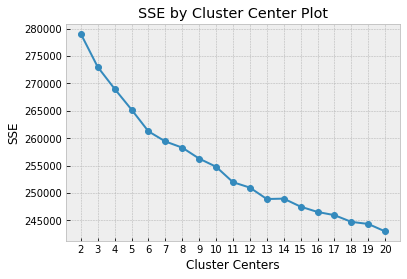

In [ ]:
find_optimal_clusters(embeddings, 20)

In [ ]:
k_means = KMeans(init ='k-means++', n_clusters= 6, n_init = 30, max_iter=500)
k_means.fit(embeddings)
clusters_6 = k_means.labels_
print(clusters_6)

[5 1 5 ... 5 2 0]


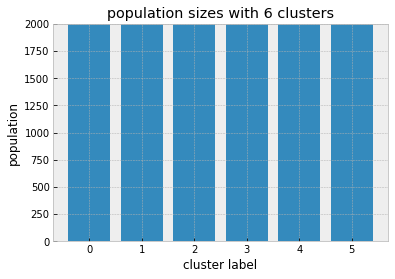

In [ ]:
plt.bar(range(len(set(k_means.labels_))), np.bincount(k_means.labels_))

plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('population sizes with {} clusters'.format(len(set(k_means.labels_))));

# truncate y axis to see the rest better
# (comment out to see the peak value for the largest cluster)
plt.ylim(0,2000);

In [ ]:
def strongest_features(model, vectorizer, topk=10):
    """
    Helper function to display a simple text representation of the top-k most
    important features in our fit model and vectorizer.

    model: sklearn model
    vectorizer: sklearn vectorizer
    topk: k numbers of words to get per cluster

    """
    # these parts are model-independent
    m_name = model.__class__.__name__
    features = vectorizer.get_feature_names()
    # different calculations per model type
    if m_name is 'KMeans':
        relevant_labels = list(set(model.labels_))
        centroids = model.cluster_centers_.argsort()[:,::-1]
        for this_label in relevant_labels:
            print('Cluster {}:'.format(this_label), end='')
            for ind in centroids[this_label, :topk]:
                print(' {}'.format(features[ind]), end='')
            print()
    elif m_name is 'HDBSCAN':
        # ignore noise labels
        relevant_labels = [ x for x in set(model.labels_) if x >= 0 ]
        for this_label in relevant_labels:
            matching_rows = np.where(hdbs.labels_ == this_label)[0]
            coeff_sums = np.sum(tfidf_matrix[matching_rows], axis=0).A1
            sorted_coeff_idxs = np.argsort(coeff_sums)[::-1]
            print('Cluster {}: '.format(this_label), end='')
            for idx in sorted_coeff_idxs[:topk]:
                print('{} '.format(features[idx]), end='')
            print()
    else:
        raise NotImplementedError('This helper method currently only supports KMeans and HDBSCAN models')

In [ ]:
strongest_features(k_means, vec, topk=15)

Cluster 0: abroad afford boss allegedly county calm celebrate blvd among astra crore detail alright dose donald
Cluster 1: abroad collapse cuz calm boot dose awful begin chance await council commissioner arrival appts chaos
Cluster 2: council destroy calm athletes authority appts big division ah chaos amongst add better comply display
Cluster 3: dick clarksville add afford abroad dose advance aunt calm comply breastfeed circle btw countries crap
Cluster 4: color clarksville dick advance afford chronic bring del circle azusa choose comply birthday commissioner compulsory
Cluster 5: clarksville athletes add azusa amid chronic del color council counties comply africa circle aunt chaos


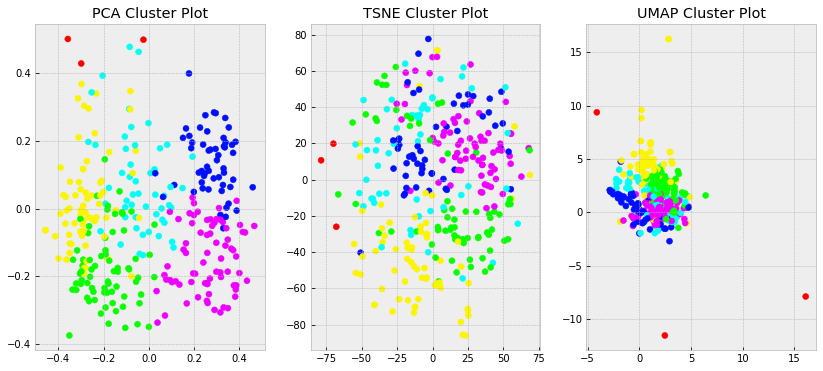

In [ ]:
def plot_tsne_pca_umap(data, labels):
    max_label = max(labels)+1
    max_items = np.random.choice(range(data.shape[0]), size=10000, replace=False)
    
    reducer=umap.UMAP()
    pca = PCA(n_components=2).fit_transform(data[max_items,:])
    tsne = TSNE().fit_transform(PCA(n_components=500).fit_transform(data[max_items,:]))
    uma=reducer.fit_transform(PCA(n_components=500).fit_transform(data[max_items,:]))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=320, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 3, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
    ax[2].scatter(uma[idx,0],uma[idx,1],c=label_subset)
    ax[2].set_title('UMAP Cluster Plot')
    
plot_tsne_pca_umap(embeddings, k_means.labels_)

In [ ]:
k_means2 = KMeans(init ='k-means++', n_clusters= 7, n_init = 30, max_iter=500)
k_means2.fit(embeddings)
clusters_7 = k_means2.labels_
print(clusters_7)

[5 4 5 ... 5 6 2]


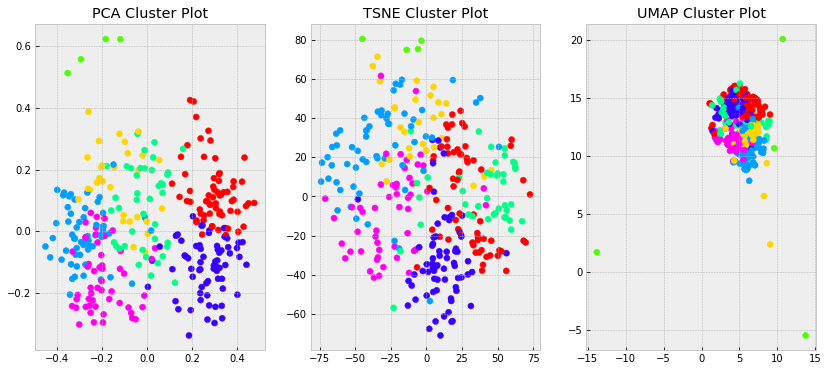

In [ ]:
plot_tsne_pca_umap(embeddings, clusters_7)

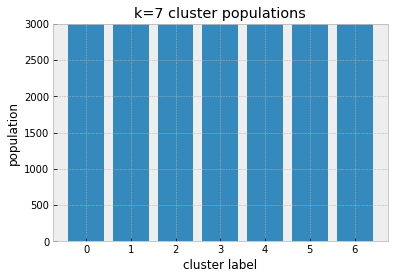

In [ ]:
plt.bar(range(len(set(k_means2.labels_))), np.bincount(k_means2.labels_))

plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('k={} cluster populations'.format(len(set(k_means2.labels_))));

# truncating the axis again!
plt.ylim(0,3000);

In [ ]:
strongest_features(k_means2, vec, topk=15)

Cluster 0: color clarksville dick advance afford del chronic bring azusa circle choose comply birthday compulsory aunt
Cluster 1: cuz dose dick alex aim abroad council boss calm clarksville brazil dosage comply await di
Cluster 2: abroad afford boss allegedly county calm celebrate blvd among astra crore detail alright billion donald
Cluster 3: add afford dick clarksville abroad del breastfeed dose circle advance collapse billion aunt btw calm
Cluster 4: collapse boot abroad calm cuz begin awful chance add dose arrival chaos category authority degree
Cluster 5: clarksville athletes add azusa amid chronic del council counties color comply africa circle crap aunt
Cluster 6: council destroy calm athletes authority big appts ah division amongst chaos add across better comply


In [ ]:
from sklearn import metrics
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(embeddings, k_means.labels_)
)

print()

Silhouette Coefficient: 0.019



In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(embeddings, k_means.labels_)

10428.370567968746

In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(embeddings, k_means.labels_)

4.52530559549269

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, init='k-means++', max_iter=500, random_state=42).fit(embeddings)
  labels = kmeans.labels_
  sil.append(silhouette_score(embeddings, labels, metric = 'cosine'))

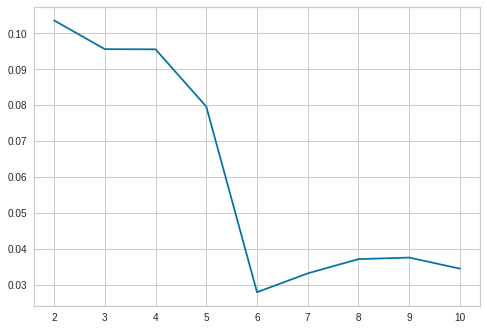

In [ ]:
k = np.array([2,3,4,5,6,7,8,9,10]).T
k = k.reshape(9,1)
plt.plot(k, sil)

## Dimensionality reduction

In [36]:
def fit_umap(x_data, umap_min_dist=0.00, umap_metric='cosine',
                   umap_dim=10, umap_neighbors=30):
    md = float(umap_min_dist)
    return umap.UMAP(
        random_state=42,
        metric=umap_metric,
        n_components=umap_dim,
        low_memory=True,
        n_jobs=-1,
        n_neighbors=umap_neighbors,
        min_dist=md).fit_transform(x_data)

In [37]:
%%time
sentence_matrix = fit_umap(embeddings, umap_neighbors=100, 
                           umap_dim=int(encoded_dimensions/100))

CPU times: user 2h 5min 1s, sys: 15min 42s, total: 2h 20min 44s
Wall time: 1h 4min 57s


## Clustering

### Kmeans on Sentence Vectors

CPU times: user 23min 33s, sys: 3min 49s, total: 27min 22s
Wall time: 16min 15s


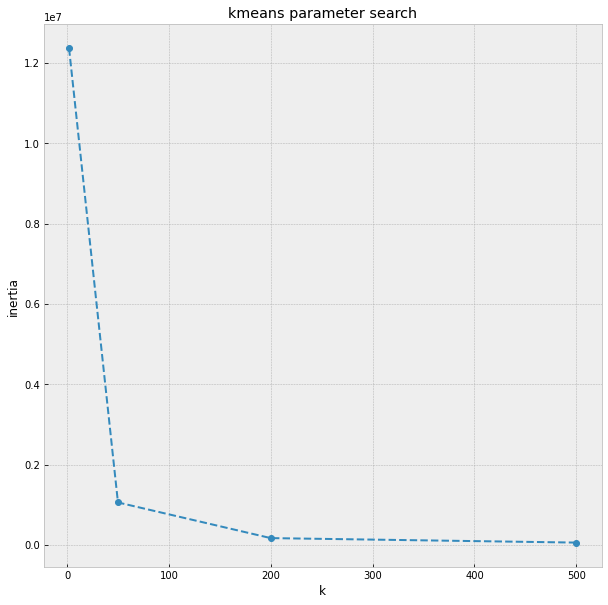

In [ ]:
%%time
# compare a broad range of ks to start
from sklearn.cluster import KMeans
ks = [2, 50, 200, 500]


# track a couple of metrics

inertias = []
import logging
# fit the models, save the evaluation metrics from each run
for k in ks:
    logging.warning('fitting model for {} clusters'.format(k))
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(sentence_matrix)
    labels = model.labels_
    inertias.append(model.inertia_)

# plot the quality metrics for inspection
plt.figure(figsize=(10,10))

plt.plot(ks, inertias, 'o--')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('kmeans parameter search')

CPU times: user 1d 14h 27min 50s, sys: 57min 43s, total: 1d 15h 25min 34s
Wall time: 11h 23min 59s


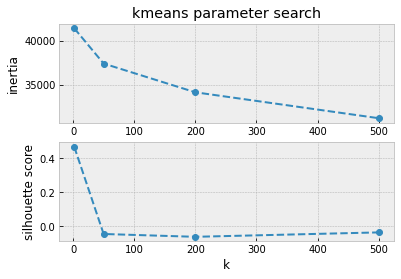

In [ ]:
%%time
# compare a broad range of ks to start
ks = [2, 50, 200, 500]


# track a couple of metrics
sil_scores = []
inertias = []
import logging
# fit the models, save the evaluation metrics from each run
for k in ks:
    logging.warning('fitting model for {} clusters'.format(k))
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(sentence_matrix)
    labels = model.labels_
    sil_scores.append(silhouette_score(sentence_matrix, labels))
    inertias.append(model.inertia_)

# plot the quality metrics for inspection
fig, ax = plt.subplots(2, 1, sharex=True)

plt.subplot(211)
plt.plot(ks, inertias, 'o--')
plt.ylabel('inertia')
plt.title('kmeans parameter search')

plt.subplot(212)
plt.plot(ks, sil_scores, 'o--')
plt.ylabel('silhouette score')
plt.xlabel('k');

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, 
                                   init_size=256, 
                                   batch_size=512, 
                                   random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters
Fit 11 clusters
Fit 12 clusters
Fit 13 clusters
Fit 14 clusters
Fit 15 clusters
Fit 16 clusters
Fit 17 clusters
Fit 18 clusters
Fit 19 clusters
Fit 20 clusters


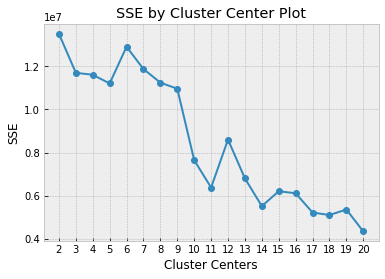

In [ ]:
find_optimal_clusters(sentence_matrix, 20)

In [ ]:
best_k = 14

km_model = KMeans(n_clusters=best_k, 
                  init="k-means++", random_state=42)
km_model.fit(sentence_matrix)

KMeans(n_clusters=14, random_state=42)

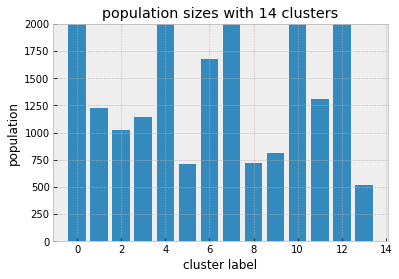

In [ ]:
plt.bar(range(len(set(km_model.labels_))), np.bincount(km_model.labels_))

plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('population sizes with {} clusters'.format(best_k));

# truncate y axis to see the rest better
# (comment out to see the peak value for the largest cluster)
plt.ylim(0,2000);

In [45]:
def strongest_features(model, vectorizer, topk=10):
    """
    Helper function to display a simple text representation of the top-k most
    important features in our fit model and vectorizer.

    model: sklearn model
    vectorizer: sklearn vectorizer
    topk: k numbers of words to get per cluster

    """
    # these parts are model-independent
    m_name = model.__class__.__name__
    features = vectorizer.get_feature_names()
    # different calculations per model type
    if m_name is 'KMeans':
        relevant_labels = list(set(model.labels_))
        centroids = model.cluster_centers_.argsort()[:,::-1]
        for this_label in relevant_labels:
            print('Cluster {}:'.format(this_label), end='')
            for ind in centroids[this_label, :topk]:
                print(' {}'.format(features[ind]), end='')
            print()
    elif m_name is 'HDBSCAN':
        # ignore noise labels
        relevant_labels = [ x for x in set(model.labels_) if x >= 0 ]
        for this_label in relevant_labels:
            matching_rows = np.where(hdbscan_cluster.labels_ == this_label)[0]
            coeff_sums = np.sum(tfidf_matrix[matching_rows], axis=0).A1
            sorted_coeff_idxs = np.argsort(coeff_sums)[::-1]
            print('Cluster {}: '.format(this_label), end='')
            for idx in sorted_coeff_idxs[:topk]:
                print('{} '.format(features[idx]), end='')
            print()
    else:
        raise NotImplementedError('This helper method currently only supports KMeans and HDBSCAN models')

In [ ]:
strongest_features(km_model, vec, topk=15)

Cluster 0: aaron abc ability ab abort abingdon able abroad abduct abortion
Cluster 1: abduct ability abortion aaron abc ab able abroad abort abingdon
Cluster 2: abingdon abc abduct abortion abort ability ab able aaron abroad
Cluster 3: abc abingdon ability abortion aaron ab abroad able abort abduct
Cluster 4: aaron able ability abingdon abc ab abortion abort abduct abroad
Cluster 5: aaron abingdon ability abortion abduct abc ab abroad abort able
Cluster 6: abduct ability ab abc abingdon aaron abroad abortion able abort
Cluster 7: ability abortion abingdon abduct aaron abc abroad able ab abort
Cluster 8: abingdon ability abortion aaron abroad ab abort able abc abduct
Cluster 9: abduct abortion abingdon aaron abc ab abroad able abort ability
Cluster 10: aaron ability abingdon able abduct abort abc ab abroad abortion
Cluster 11: abc ability abingdon ab abroad abortion abduct able abort aaron
Cluster 12: abortion abduct abingdon ability aaron ab abc abort able abroad
Cluster 13: ability ab

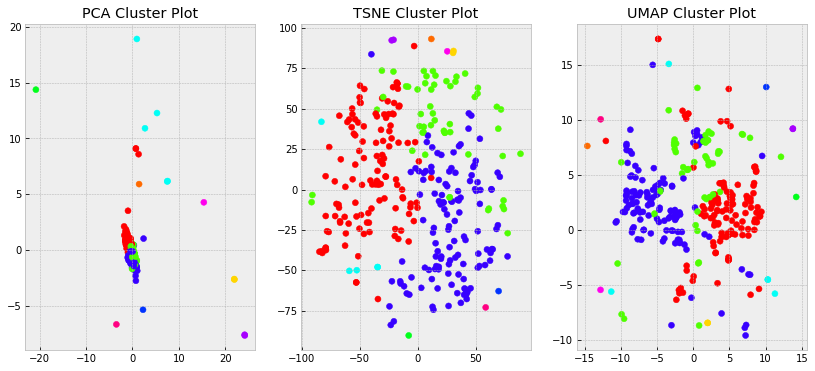

In [ ]:
def plot_tsne_pca_umap(data, labels):
    max_label = max(labels)+1
    max_items = np.random.choice(range(data.shape[0]), size=20000, replace=False)
    
    reducer=umap.UMAP()
    pca = PCA(n_components=2).fit_transform(data[max_items,:])
    tsne = TSNE().fit_transform(PCA(n_components=10).fit_transform(data[max_items,:]))
    uma=reducer.fit_transform(PCA(n_components=10).fit_transform(data[max_items,:]))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=320, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 3, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
    ax[2].scatter(uma[idx,0],uma[idx,1],c=label_subset)
    ax[2].set_title('UMAP Cluster Plot')
    
plot_tsne_pca_umap(sentence_matrix, km_model.labels_)

In [51]:
smaller_k = 4
km_model = KMeans(n_clusters=smaller_k, random_state=42)
km_model.fit(sentence_matrix)

KMeans(n_clusters=4, random_state=42)

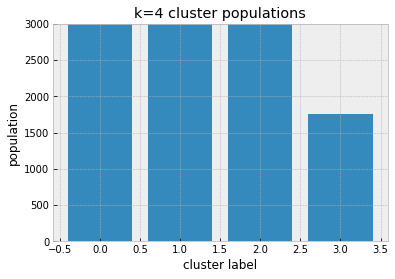

In [ ]:
plt.bar(range(len(set(km_model.labels_))), np.bincount(km_model.labels_))

plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('k={} cluster populations'.format(smaller_k));

# truncating the axis again!
plt.ylim(0,3000);

In [ ]:
strongest_features(km_model, vec, topk=15)

Cluster 0: aaron abortion abc abroad able ability ab abingdon abduct abort
Cluster 1: abroad aaron abduct ability abingdon abc abort able ab abortion
Cluster 2: aaron ability ab abingdon abc abortion abroad able abort abduct
Cluster 3: ability abduct abroad ab abingdon abc abortion able abort aaron


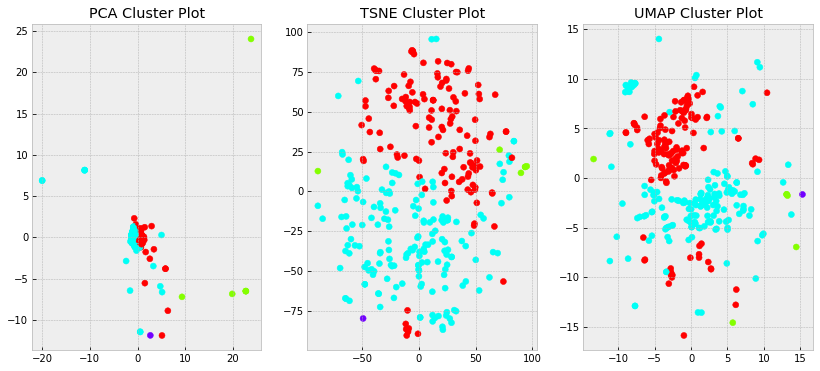

In [ ]:
plot_tsne_pca_umap(sentence_matrix, km_model.labels_)

In [ ]:
from sklearn import metrics
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(sentence_matrix, km_model.labels_)
)

print()

Silhouette Coefficient: 0.254



In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(sentence_matrix, km_model.labels_)

52406.098779117456

In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(sentence_matrix, km_model.labels_)

1.2665795554561663

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, init='k-means++', max_iter=500, random_state=42).fit(sentence_matrix)
  labels = kmeans.labels_
  sil.append(silhouette_score(sentence_matrix, labels, metric = 'cosine'))

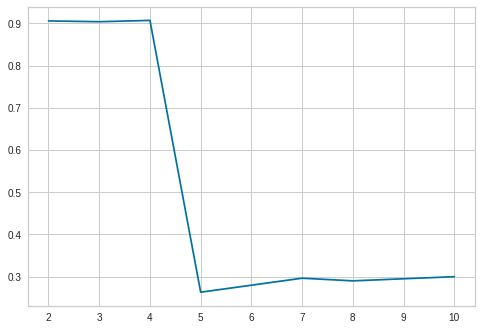

In [ ]:
k = np.array([2,3,4,5,6,7,8,9,10]).T
k = k.reshape(9,1)
plt.plot(k, sil)

In [52]:
from sklearn import metrics
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(sentence_matrix, km_model.labels_, metric='cosine')
)

print()

Silhouette Coefficient: 0.907



## HDBSCAN on Sentence Vectors

In [38]:
hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=1000,
                                min_samples=200,
                               prediction_data=True,
                               core_dist_n_jobs=-1,
                               algorithm='best',
                               gen_min_span_tree=True).fit(sentence_matrix)

In [39]:
hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=1000,
                                min_samples=200,
                               prediction_data=True,
                               core_dist_n_jobs=-1,
                               algorithm='best',
                               gen_min_span_tree=True).fit_predict(sentence_matrix)

In [40]:
unique, counts = np.unique(hdbscan_labels, return_counts=True)
print (np.asarray((unique, counts)).T)

[[    -1   7982]
 [     0   1185]
 [     1   1037]
 [     2   1145]
 [     3   1024]
 [     4   1075]
 [     5 355140]]


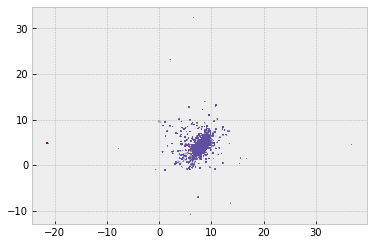

In [41]:
clustered = (hdbscan_cluster.labels_ >= 0)
plt.scatter(sentence_matrix[~clustered, 0],
            sentence_matrix[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(sentence_matrix[clustered, 0],
            sentence_matrix[clustered, 1],
            c=hdbscan_labels[clustered],
            s=0.1,
            cmap='Spectral');

In [46]:
strongest_features(hdbscan_cluster, vec, topk=15)

Cluster 0: slot availability pm pay free family fast fascinate farm far faqs faq fantastic fancy fan 
Cluster 1: dose slot availability pay free somehow oxygen shortage december card know faq fancy fantastic faqs 
Cluster 2: dose slot availability pm pay free zydus fascinate farm far faqs faq fantastic fancy fan 
Cluster 3: slot availability pay free find tap reserve wi feature area pause anywhere san available everything 
Cluster 4: action room super reference page even green full reverse gear family fan fancy faqs fantastic 
Cluster 5: get vaccine covid dose vaccinate amp people first today vaccination take vaccines say go one 


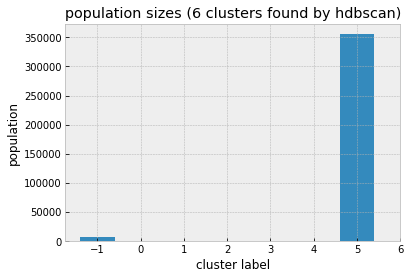

In [47]:
# get the population sizes
label_counts = Counter(hdbscan_cluster.labels_)
xs, ys = [], []
for k,v in label_counts.items():
    xs.append(k)
    ys.append(v)

# draw the chart
plt.bar(xs, ys)

plt.xticks(range(-1, len(label_counts)))
plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('population sizes ({} clusters found by hdbscan)'.format(len(label_counts) - 1));

In [ ]:
from sklearn import metrics
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(sentence_matrix, hdbscan_labels)
)

print()

Silhouette Coefficient: 0.848



In [50]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(sentence_matrix, hdbscan_labels)

31719.21987621553

In [49]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(sentence_matrix, hdbscan_labels)

1.9480858553232765

In [48]:
hdbscan_cluster.relative_validity_

0.01868997513582877